In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [3]:
!pip install imdbpy

     |████████████████████████████████| 298 kB 6.8 MB/s 


## Task 1: To get the IMDB code & URL's

 Before starting the analysis I explored the data a bit and noted some factors that affected our analysis. One of them was that in some cases the movie title was given as **PK(film)** and while searching no result was shown for such cases and similar thing happened for cases like **Ghajini(2008 film)** and **Baby(2015 Hindi Film)**. So, using sql and excel I edited the data a bit which can be found in the **Bollywood_Movie_Dataset_Cleaned.xlsx** which i'll be submitting with this file. Also, there were some unwanted symbols like **Gangs of Wasseypur *â€“* Part 2** which i filtered out as well. As a result i was able to find the data of *3972/4000* movies on imdb while earlier this data was limited to just *2800/4000*.

In [4]:
from imdb import IMDb
import pandas as pd 
from requests import get
mm = IMDb()

In [5]:
db = pd.read_csv('Dataset/Bollywood_Movies_Dataset_Cleaned.csv')
db.head()

,Movie Title
0,3 Idiots
1,Taare Zameen Par
2,PK
3,Dangal
4,Rang De Basanti


In [6]:
movie_list = db['Movie Title'].tolist()
movie_list[686]

'Deewangee'

In [ ]:
url_list = []
imdb_id = []
for name in movie_list:
  movies = mm.search_movie(name)
  try:
    id = movies[0].movieID
    imdb_id.append(id)
    url_list.append('https://www.imdb.com/title/tt'+str(id))
  except:
    imdb_id.append('NaN')
    url_list.append('Url not found!!')

In [ ]:
len(url_list)

4000

In [ ]:
db['url'] = url_list
db['imdb_id'] = imdb_id
db.count()

Movie Title    4000
url            4000
imdb_id        4000
dtype: int64

In [ ]:
db.head()

,Movie Title,url,imdb_id
0,3 Idiots,https://www.imdb.com/title/tt1187043,1187043
1,Taare Zameen Par,https://www.imdb.com/title/tt0986264,0986264
2,PK,https://www.imdb.com/title/tt2338151,2338151
3,Dangal,https://www.imdb.com/title/tt5074352,5074352
4,Rang De Basanti,https://www.imdb.com/title/tt0405508,0405508


In [ ]:
db = db[db.url != 'Url not found!!']
db.count()

Movie Title    3971
url            3971
imdb_id        3971
dtype: int64

In [ ]:
db.to_csv('Outputs/movies_id_url.csv', index=False)

## Task 2: To make a new Database containing requested colomns

In [7]:
new_db = pd.read_csv('Outputs/movies_id_url.csv')

In [9]:
imdb_id = new_db['imdb_id'].tolist()

In [ ]:
def create_db(id):
  data = mm.get_movie(id)

  try:
    release = str(data.get('original air date'))
  except:
    release = 'NaN'


  try:
    genres = data.get('genres')
  except:
    genres = 'NaN'


  cast = []
  for i in range(3):
    try:
      fxn = data.get('cast')[i]
      cast.append(fxn['name'])
    except:
      pass


  crew = []
  posts = ['directors', 'producers', 'writers', 'composers', 'cinematographers', 'editors', 'casting directors']
  for i in posts:
    try:
      temp = data.get(i)[0]['name']
      if temp not in crew:
        crew.append(temp)
    except:
      pass


  try:
    ratings = data.get('rating')
  except:
    ratings = 'NaN'
  
  
  try:
    votes = data.get('votes')
  except:
    votes = 'NaN'
  
  
  try:
    plot = data.get('plot')[0]
  except:
    plot = 'NaN'

  return release, genres, cast, crew, ratings, votes, plot

In [ ]:
Release = []
Genres = []
Cast = []
Crew = []
Ratings = []
Votes = []
Plot = []
temp = 0

for id in imdb_id:
  release, genres, cast, crew, ratings, votes, plot = create_db(id)
  Release.append(release)
  Genres.append(genres)
  Cast.append(cast)
  Crew.append(crew)
  Ratings.append(ratings)
  Votes.append(votes)
  Plot.append(plot)
  temp = temp + 1
  if temp%50==0:
    print('Done with {} movies'.format(temp))

Done with 50 movies
Done with 100 movies
Done with 150 movies
Done with 200 movies
Done with 250 movies
Done with 300 movies
Done with 350 movies
Done with 400 movies
Done with 450 movies
Done with 500 movies
Done with 550 movies
Done with 600 movies
Done with 650 movies
Done with 700 movies
Done with 750 movies
Done with 800 movies
Done with 850 movies
Done with 900 movies
Done with 950 movies
Done with 1000 movies
Done with 1050 movies
Done with 1100 movies
Done with 1150 movies
Done with 1200 movies
Done with 1250 movies
Done with 1300 movies
Done with 1350 movies
Done with 1400 movies
Done with 1450 movies
Done with 1500 movies
Done with 1550 movies
Done with 1600 movies
Done with 1650 movies
Done with 1700 movies
Done with 1750 movies
Done with 1800 movies
Done with 1850 movies
Done with 1900 movies
Done with 1950 movies
Done with 2000 movies
Done with 2050 movies
Done with 2100 movies
Done with 2150 movies
Done with 2200 movies
Done with 2250 movies
Done with 2300 movies
Done wit

In [ ]:
new_db['Release'] = Release
new_db['Genres'] = Genres
new_db['Cast'] = Cast
new_db['Crew'] = Crew
new_db['Ratings'] = Ratings
new_db['Votes'] = Votes
new_db['Plot'] = Plot

In [ ]:
new_db.count()

Movie Title    3971
url            3971
imdb_id        3971
Release        3971
Genres         3959
Cast           3971
Crew           3971
Ratings        3904
Votes          3904
Plot           3971
dtype: int64

In [ ]:
new_db.head()

,Movie Title,url,imdb_id,Release,Genres,Cast,Crew,Ratings,Votes,Plot
0,3 Idiots,https://www.imdb.com/title/tt1187043,1187043,24 Dec 2009 (Netherlands),"[Comedy, Drama]","[Aamir Khan, Madhavan, Sharman Joshi]","[Rajkumar Hirani, Deepak Bhagra, Shantanu Moit...",8.4,365682.0,Two friends are searching for their long lost ...
1,Taare Zameen Par,https://www.imdb.com/title/tt0986264,986264,21 Dec 2007 (Canada),"[Drama, Family]","[Darsheel Safary, Aamir Khan, Tisca Chopra]","[Aamir Khan, Ajay Bijli, Amole Gupte, Shankar ...",8.4,179684.0,An eight-year-old boy is thought to be a lazy ...
2,PK,https://www.imdb.com/title/tt2338151,2338151,19 Dec 2014 (Netherlands),"[Comedy, Drama, Musical, Sci-Fi]","[Aamir Khan, Rajinder Sharma Nanu, Anushka Sha...","[Rajkumar Hirani, Vidhu Vinod Chopra, Atul Gog...",8.1,171628.0,An alien on Earth loses the only device he can...
3,Dangal,https://www.imdb.com/title/tt5074352,5074352,23 Dec 2016 (Netherlands),"[Action, Biography, Drama, Sport]","[Aamir Khan, Fatima Sana Shaikh, Sanya Malhotra]","[Nitesh Tiwari, Vishesh Agrawal, Piyush Gupta,...",8.4,169980.0,Former wrestler Mahavir Singh Phogat and his t...
4,Rang De Basanti,https://www.imdb.com/title/tt0405508,405508,26 Jan 2006 (India),"[Comedy, Crime, Drama]","[Aamir Khan, Siddharth, Sharman Joshi]","[Rakeysh Omprakash Mehra, Adam Bohling, Renzil...",8.1,116181.0,The story of six young Indians who assist an E...


In [ ]:
new_db.to_csv('Outputs/movies_database.csv', index=False)

## Task 3: Additional data processing

In [ ]:
df = pd.read_csv('Outputs/movies_database.csv')

In [ ]:
# Divided by 35000 because highest voted indian movie has 350,000 votes
df['Popularity'] = (df['Votes']/35000+df['Ratings'])/2

In [ ]:
df.head()

,Movie Title,url,imdb_id,Release,Genres,Cast,Crew,Ratings,Votes,Plot,Popularity
0,3 Idiots,https://www.imdb.com/title/tt1187043,1187043,24 Dec 2009 (Netherlands),"['Comedy', 'Drama']","['Aamir Khan', 'Madhavan', 'Sharman Joshi']","['Rajkumar Hirani', 'Deepak Bhagra', 'Shantanu...",8.4,365682.0,Two friends are searching for their long lost ...,9.424029
1,Taare Zameen Par,https://www.imdb.com/title/tt0986264,986264,21 Dec 2007 (Canada),"['Drama', 'Family']","['Darsheel Safary', 'Aamir Khan', 'Tisca Chopra']","['Aamir Khan', 'Ajay Bijli', 'Amole Gupte', 'S...",8.4,179684.0,An eight-year-old boy is thought to be a lazy ...,6.766914
2,PK,https://www.imdb.com/title/tt2338151,2338151,19 Dec 2014 (Netherlands),"['Comedy', 'Drama', 'Musical', 'Sci-Fi']","['Aamir Khan', 'Rajinder Sharma Nanu', 'Anushk...","['Rajkumar Hirani', 'Vidhu Vinod Chopra', 'Atu...",8.1,171628.0,An alien on Earth loses the only device he can...,6.501829
3,Dangal,https://www.imdb.com/title/tt5074352,5074352,23 Dec 2016 (Netherlands),"['Action', 'Biography', 'Drama', 'Sport']","['Aamir Khan', 'Fatima Sana Shaikh', 'Sanya Ma...","['Nitesh Tiwari', 'Vishesh Agrawal', 'Piyush G...",8.4,169980.0,Former wrestler Mahavir Singh Phogat and his t...,6.628286
4,Rang De Basanti,https://www.imdb.com/title/tt0405508,405508,26 Jan 2006 (India),"['Comedy', 'Crime', 'Drama']","['Aamir Khan', 'Siddharth', 'Sharman Joshi']","['Rakeysh Omprakash Mehra', 'Adam Bohling', ""R...",8.1,116181.0,The story of six young Indians who assist an E...,5.709729


In [ ]:
from datetime import date 
todays_date = date.today()
present_year = todays_date.year
RY = df['Release'].tolist()
release_year = []
for i in RY:
  release_year.append(i[7:11])
year = release_year[0]

AOC = []
for year in release_year:
  try:
    AOC.append(str(int(present_year)-int(year))+" years")
  except:
    AOC.append('NaN')
df['Age of Content'] = AOC

In [ ]:
df.head()

,Movie Title,url,imdb_id,Release,Genres,Cast,Crew,Ratings,Votes,Plot,Popularity,Age of Content
0,3 Idiots,https://www.imdb.com/title/tt1187043,1187043,24 Dec 2009 (Netherlands),"['Comedy', 'Drama']","['Aamir Khan', 'Madhavan', 'Sharman Joshi']","['Rajkumar Hirani', 'Deepak Bhagra', 'Shantanu...",8.4,365682.0,Two friends are searching for their long lost ...,9.424029,12 years
1,Taare Zameen Par,https://www.imdb.com/title/tt0986264,986264,21 Dec 2007 (Canada),"['Drama', 'Family']","['Darsheel Safary', 'Aamir Khan', 'Tisca Chopra']","['Aamir Khan', 'Ajay Bijli', 'Amole Gupte', 'S...",8.4,179684.0,An eight-year-old boy is thought to be a lazy ...,6.766914,14 years
2,PK,https://www.imdb.com/title/tt2338151,2338151,19 Dec 2014 (Netherlands),"['Comedy', 'Drama', 'Musical', 'Sci-Fi']","['Aamir Khan', 'Rajinder Sharma Nanu', 'Anushk...","['Rajkumar Hirani', 'Vidhu Vinod Chopra', 'Atu...",8.1,171628.0,An alien on Earth loses the only device he can...,6.501829,7 years
3,Dangal,https://www.imdb.com/title/tt5074352,5074352,23 Dec 2016 (Netherlands),"['Action', 'Biography', 'Drama', 'Sport']","['Aamir Khan', 'Fatima Sana Shaikh', 'Sanya Ma...","['Nitesh Tiwari', 'Vishesh Agrawal', 'Piyush G...",8.4,169980.0,Former wrestler Mahavir Singh Phogat and his t...,6.628286,5 years
4,Rang De Basanti,https://www.imdb.com/title/tt0405508,405508,26 Jan 2006 (India),"['Comedy', 'Crime', 'Drama']","['Aamir Khan', 'Siddharth', 'Sharman Joshi']","['Rakeysh Omprakash Mehra', 'Adam Bohling', ""R...",8.1,116181.0,The story of six young Indians who assist an E...,5.709729,15 years


In [ ]:
df.to_csv('Outputs/movies_database_aditional_data.csv', index=False)

Task 4: Exploratory data analysis

In [10]:
db = pd.read_csv('Outputs/movies_database.csv')

In [11]:
Genres = db['Genres'].tolist()
Actors = db['Cast'].tolist()

In [12]:
db['Cast'][0]

"['Aamir Khan', 'Madhavan', 'Sharman Joshi']"

In [14]:
movie_genras = []
movie_cast = []

for i in Actors:
  try:
    ii = i.strip('][').split(', ')
    for actor in ii:
      movie_cast.append(actor)
  except:
    movie_cast.append('NaN')

for j in Genres:
  try:
    jj = j.strip('][').split(', ')
    for genre in jj:
      movie_genras.append(genre)
  except:
    movie_genras.append('NaN')

df = pd.DataFrame(list(zip(movie_cast, movie_genras)), columns =['Actor', 'Genre'])
df['Genre'] = df[df.G != 'Url not found!!']
df.head()

,Actors,Genre
0,'Aamir Khan','Comedy'
1,'Madhavan','Drama'
2,'Sharman Joshi','Drama'
3,'Darsheel Safary','Family'
4,'Aamir Khan','Comedy'


In [18]:
df['Genre'].value_counts()

'Drama'          2835
'Romance'        1419
'Action'         1372
'Comedy'         1064
'Thriller'        830
'Crime'           683
'Musical'         415
'Family'          381
'Mystery'         232
'Adventure'       173
'Horror'          114
'Fantasy'         113
'History'          61
'Biography'        61
'Sport'            52
'War'              43
'Music'            42
'Sci-Fi'           38
'Short'            19
'Animation'        17
'Documentary'      15
NaN                12
'Western'           8
'Reality-TV'        3
'News'              2
Name: Genre, dtype: int64

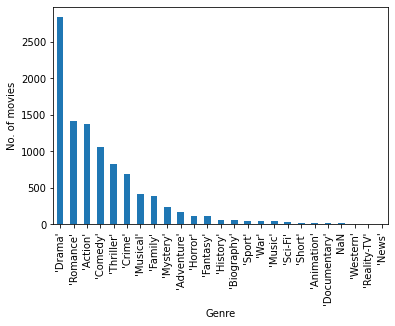

In [36]:
import matplotlib.pyplot as plt
df['Genre'].value_counts().plot(kind= 'bar')
plt.xlabel("Genre")
plt.ylabel("No. of movies")
plt.savefig('Plots/Top_Genres.png')
plt.show()

In [34]:
df['Actors'].value_counts()[:10]

'Amitabh Bachchan'      137
'Dharmendra'            129
'Mithun Chakraborty'    112
'Akshay Kumar'          101
'Sanjay Dutt'            99
'Rajesh Khanna'          99
'Rishi Kapoor'           91
'Jeetendra'              89
'Govinda'                85
'Jackie Shroff'          77
Name: Actors, dtype: int64

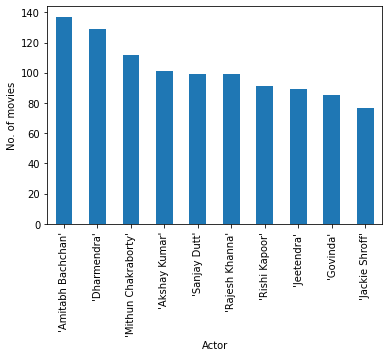

In [37]:
df['Actors'].value_counts()[:10].plot(kind= 'bar')
plt.xlabel("Actor")
plt.ylabel("No. of movies")
plt.savefig('Plots/Top10_Actors.png')
plt.show()